In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

from pianoq.lab.dmd import DMD
from pianoq.lab.VimbaCamera import VimbaCamera
from pianoq.lab.lee_holo.generate_lee import make_oam_donut
from pianoq.misc.misc import colorize
from pianoq.misc.mplt import mimshow

from pianoq.lab.lee_holo.lab_helpers import LabMeasure, LabResults


In [2]:
# Initialize hardware
cam = VimbaCamera(0)
dmd = DMD()


INFO:vmbpyLog:Starting vmbpy: 1.0.4 (using VmbC: 1.0.5, VmbImageTransform: 2.0)


Connected!
Built project!


In [ ]:
# Experiment Parameters
GRATING_PERIOD_PX = 8
CARRIER_F = (1 / GRATING_PERIOD_PX, 0)
DUTY_CYCLE = 0.5
FOURIER_CROP_SLICE = np.s_[420:500, 720:800]
EXPOSURE_TIME_MS = 50
BASE_DIR = r'G:\My Drive\Projects\Lee holograms\Results'

In [4]:
# Setup LabMeasure
lab_measure = LabMeasure(
    dmd=dmd,
    cam=cam,
    carrier_f=CARRIER_F,
    duty_cycle=DUTY_CYCLE,
    fourier_crop_slice=FOURIER_CROP_SLICE,
)


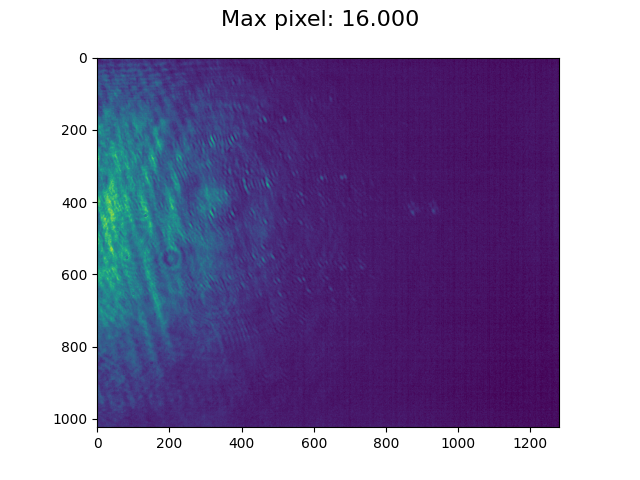

c:\Users\owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [5]:
# Live View (press 'q' in the plot window to close)
lab_measure.live_view()


In [6]:
# Define Targets and Metadata
targets_to_measure = {}
for ell in [1, 2, 3, 4]:
    name = f"ell_{ell}"
    target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=ell, r0=0.15, sigma=0.05)
    targets_to_measure[name] = target

experiment_metadata = {
    "exposure_time_ms": EXPOSURE_TIME_MS,
    "notes": "First run with new batch save feature."
}


In [ ]:
# Run Experiment
cam.set_exposure_time(EXPOSURE_TIME_MS)
results = lab_measure.run_experiment(targets_to_measure, experiment_metadata)


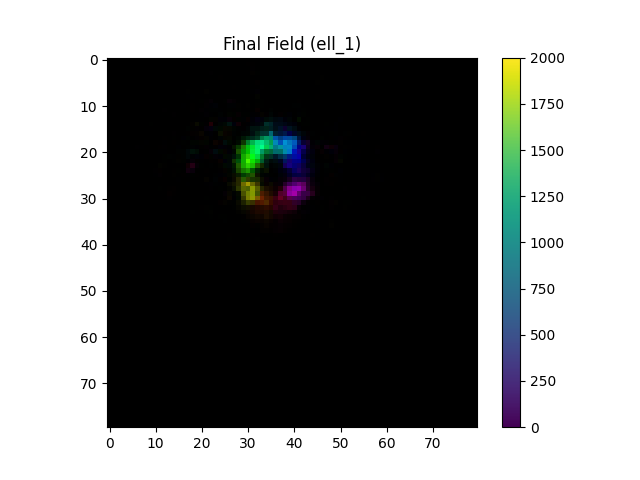

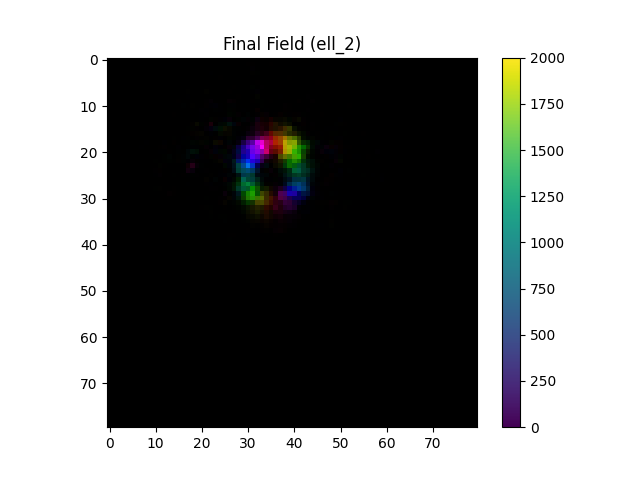

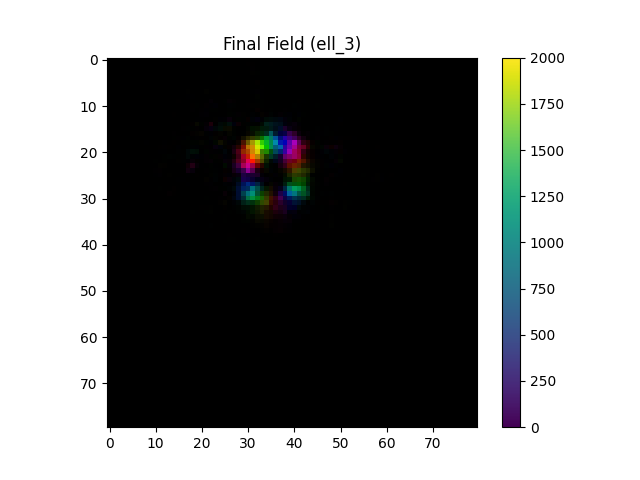

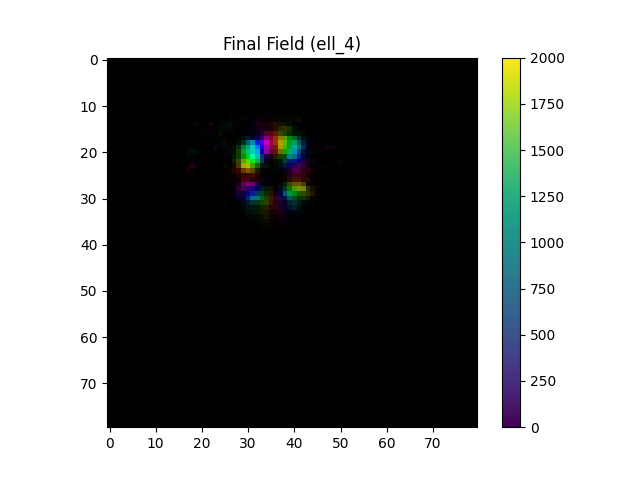

In [ ]:
# Visualize Results
for name, result in results.items():
    # corrected_field = result.get_corrected_field()
    # mimshow(colorize(corrected_field), vmax=2000, title=f'Final Field ({name})', figshow=False)
    reconstructed_field = result.get_reconstructed_field(result.camera_image)
    mimshow(colorize(reconstructed_field), vmax=2000, title=f'Final Field ({name})', figshow=False)


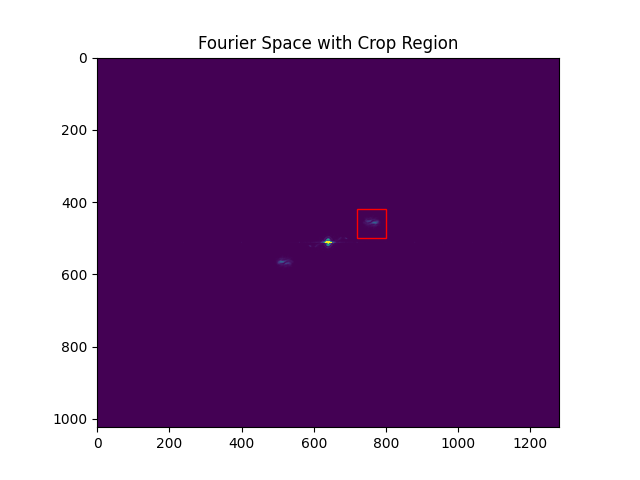

In [ ]:
# Debug: View Fourier space for one of the results
results['ell_1'].plot_fourier_space()


In [ ]:
# Save all results to a folder
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
lab_measure.save_results(results, f"{BASE_DIR}/{timestamp}")


Saved result to results/2025-11-12_08-31-04\ell_1.npz
Saved result to results/2025-11-12_08-31-04\ell_2.npz
Saved result to results/2025-11-12_08-31-04\ell_3.npz
Saved result to results/2025-11-12_08-31-04\ell_4.npz


Loaded metadata: {'timestamp': '2025-11-12T08:31:03.338321', 'name': 'ell_1', 'exposure_time_ms': 50, 'notes': 'First run with new batch save feature.'}


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Loaded field: ell_1'}>)

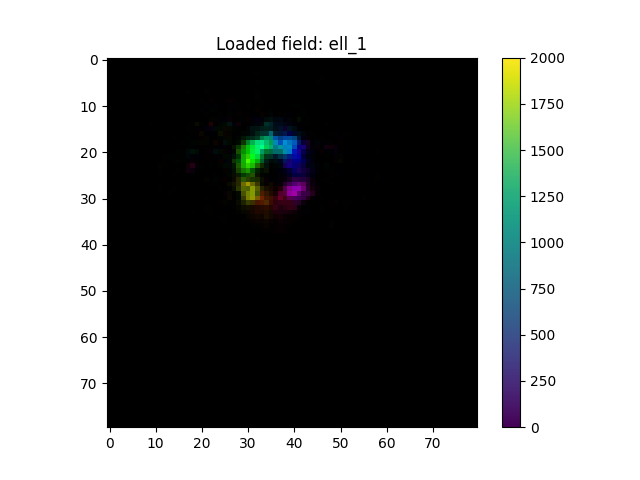

In [ ]:
# Load and verify one result
loaded_result = LabResults.load(f"results/{timestamp}/ell_1.npz")

# Print its metadata
print("Loaded metadata:", loaded_result.metadata)

# Plot to verify
mimshow(colorize(loaded_result.get_corrected_field()), vmax=2000, title=f"Loaded field: {loaded_result.metadata['name']}", figshow=False)


In [ ]:
# Cleanup
# dmd.close()
# cam.close()
